In [5]:
import sys
import os
import torch
import numpy as np
import torchvision
import cv2
import matplotlib.pyplot as plt
import WDNet

os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"
basic_path = '../../' # local drive
device='cuda'
#device='cpu'

dirs = os.listdir(os.path.join(basic_path,'YandexDisk\ML_models\model_WDNet'))
print(dirs)

['2023-10-30_colab', '2023-11-01_ds', '2024-03-24_local', '2024-03-27_local', '2024-04-13', '2024-04-16_myds-1', '2024-04-16_myds-3', '2024-04-16_mydsv2-1', '2024-04-16_mydsv2-2', 'pretrained_src']


In [2]:
torch.cuda.empty_cache()
args ={}
args['epoch'] = 1
args['batch_size'] = 4 # 12 for 16Gb
args['save_dir'] = os.path.join(basic_path,'YandexDisk\ML_models\model_WDNet','2024-04-16_mydsv2-2')
args['result_dir'] = ''
args['dataset'] = basic_path+'tmp/new_dataset/CLWD_ext'
args['log_dir'] = basic_path
args['gpu_mode'] = True if device=='cuda' else False
args['input_size'] = 28 # не знаю что это
args['dataloader_workers'] = 0 # 0 if windows
args['gan_type'] = 'CGAN'
args['lrG'] = 0.0002
args['lrD'] = 0.0002
args['beta1'] = 0.5
args['beta2'] = 0.999

== args ==
epoch = 1
batch_size = 4
save_dir = ../../YandexDisk\ML_models\model_WDNet\2024-04-16_mydsv2-2
result_dir = 
dataset = ../../tmp/new_dataset/CLWD_ext
log_dir = ../../
gpu_mode = True
input_size = 28
dataloader_workers = 0
gan_type = CGAN
lrG = 0.0002
lrD = 0.0002
beta1 = 0.5
beta2 = 0.999

Model loaded from ../../YandexDisk\ML_models\model_WDNet\2024-04-16_mydsv2-2


In [ ]:
for dir in dirs:
    print(f'=== {dir} ===')
    args['save_dir'] = os.path.join(basic_path,'YandexDisk\ML_models\model_WDNet',dir)
    wdnet = WDNet.WDNet(args)
    wdnet.test()

['2023-10-30_colab', '2023-11-01_ds', '2024-03-24_local', '2024-03-27_local', '2024-04-13', '2024-04-16_myds-1', '2024-04-16_myds-3', '2024-04-16_mydsv2-1', '2024-04-16_mydsv2-2', 'pretrained_src']


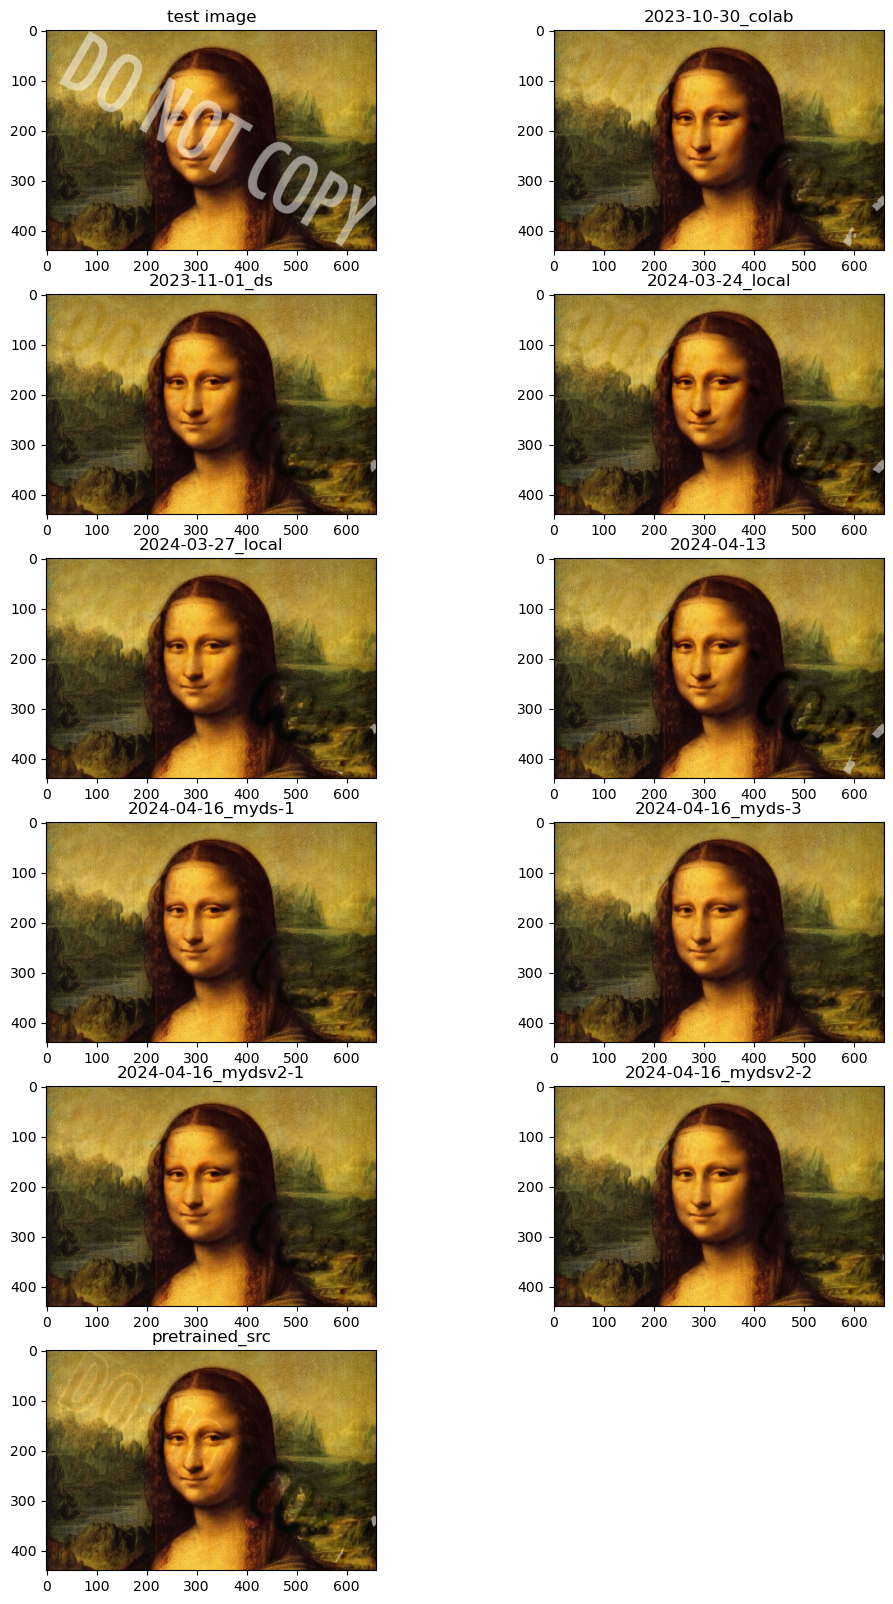

In [19]:
#pick-up test image
test_img_path = os.path.join('test_img','wm2.jpg')
test_img = torchvision.io.read_image(test_img_path)
test_img = test_img.float() / 255
test_img = test_img.unsqueeze(0)
test_img = test_img.to(device)

rows = 1
cols = len(dirs)
max_cols = 3
if cols>max_cols:
    rows = len(dirs) // max_cols + 1
    cols = max_cols

plt.rcParams["figure.figsize"] = (12,20)
plt.subplot(rows, cols, 1)
plt.gca().set_title('test image')
plt.imshow(test_img.squeeze(0).cpu().permute(1,2,0))

i=2


for e in dirs:
    with torch.no_grad():  
        G_path = os.path.join(basic_path,'YandexDisk\ML_models\model_WDNet',e,'WDNet_G.pkl')
        G = WDNet.generator(3,3)
        G.to(device)
        G.load_state_dict(torch.load(G_path))
        G.eval()
        restored_img = G(test_img)

    plt.subplot(rows, cols, i)
    if len(e) == 0: e='latest'
    plt.gca().set_title(e)
    plt.imshow(restored_img[0].squeeze(0).cpu().permute(1,2,0).detach().numpy())
    i+=1